In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from os import listdir
from os.path import join

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
files = listdir('../data/us_lite')
path = '../data/us_lite'
dfs = [(f.replace('.csv',''), pd.read_csv(join(path,f))) for f in files]

In [3]:
def plot_sb_sd_diff(df, title, save_fig = True):
    dfsb = df[df['sample']== 'sugar_baby']['per_meet_amount']
    dfsd = df[df['sample']== 'sugar_daddy']['per_meet_amount']
    sb_num = dfsb.shape[0]
    sd_num = dfsd.shape[0]
    plt.figure(figsize=(10, 6))
    plt.title('Per meet amount general {}'.format(title))
    plt.xlabel('dollars')
    
    s, loc, scale = stats.lognorm.fit(dfsb, floc=0)
    # Generate x values for the PDF
    #x = np.linspace(min(dfsb), max(dfsb), 100)
    # Extract parameters
    sigma = s  # σ is the shape parameter 's'
    mu = np.log(scale)  # μ = ln(scale), since scale = exp(μ)
    median = np.exp(mu)  # Median = exp(μ)
    mean = np.exp(mu + (sigma**2) / 2)  # Mean = exp(μ + σ² / 2)
    sb_median = median
    sb_mean = mean
    # Add vertical lines for median and mean
    plt.axvline(median, color='r', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    #plt.plot(x, pdf, color = 'r', linestyle = '-.', label='Log-Normal Fit')
    plt.hist(dfsb, color='red', alpha=0.5, label='sugar baby (n = {})'.format(sb_num), bins=20, density=True)
    # Fit log-normal distribution, fixing loc=0
    s, loc, scale = stats.lognorm.fit(dfsd, floc=0)
    #x = np.linspace(min(dfsd), max(dfsd), 100)
    # Extract parameters
    sigma = s  # σ is the shape parameter 's'
    mu = np.log(scale)  # μ = ln(scale), since scale = exp(μ)
    median = np.exp(mu)  # Median = exp(μ)
    mean = np.exp(mu + (sigma**2) / 2)  # Mean = exp(μ + σ² / 2)
    sd_median = median
    sd_mean = mean
    # Fit log-normal distribution, fixing loc=0
    # Add vertical lines for median and mean
    plt.axvline(median, color='b', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mean, color='b', linestyle='--', label=f'Mean: {mean:.2f}')
    #plt.plot(x, pdf, color = 'b', linestyle = '-.', label='Log-Normal Fit')
    plt.hist(dfsd, color = 'blue',alpha = .5,label='sugar daddy (n = {})'.format(sd_num),bins=20,density=True)
    # Fit log-normal distribution, fixing loc=0
    s, loc, scale = stats.lognorm.fit(dfsb, floc=0)
    
    # Extract parameters
    sigma = s  # σ is the shape parameter 's'
    mu = np.log(scale)  # μ = ln(scale), since scale = exp(μ)
    
    # Calculate median and mean
    median = np.exp(mu)  # Median = exp(μ)
    mean = np.exp(mu + (sigma**2) / 2)  # Mean = exp(μ + σ² / 2)
    plt.legend()
    #plt.savefig("daddies vs babies.png")
    if save_fig:
        plt.savefig('{}.png'.format(title))
        print ("saved")
    plt.show()
    return sb_mean, sb_median, sd_mean, sd_median
    


saved


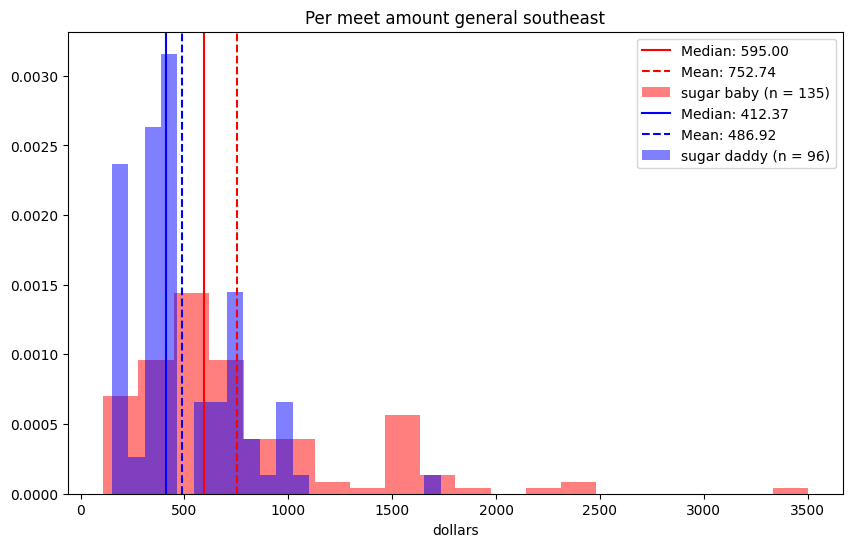

saved


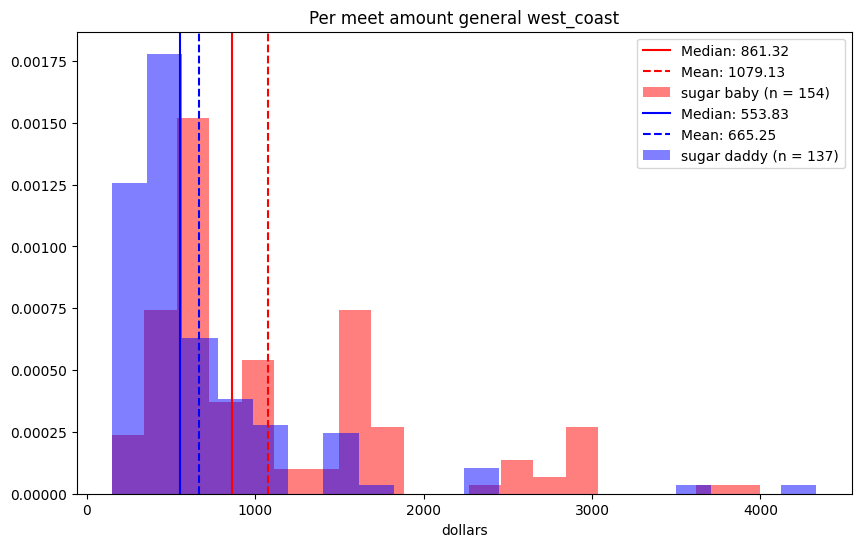

saved


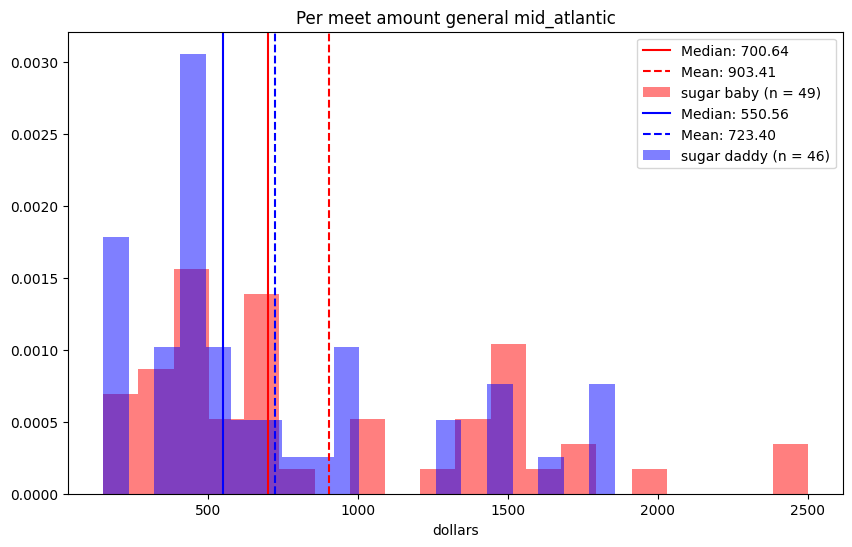

saved


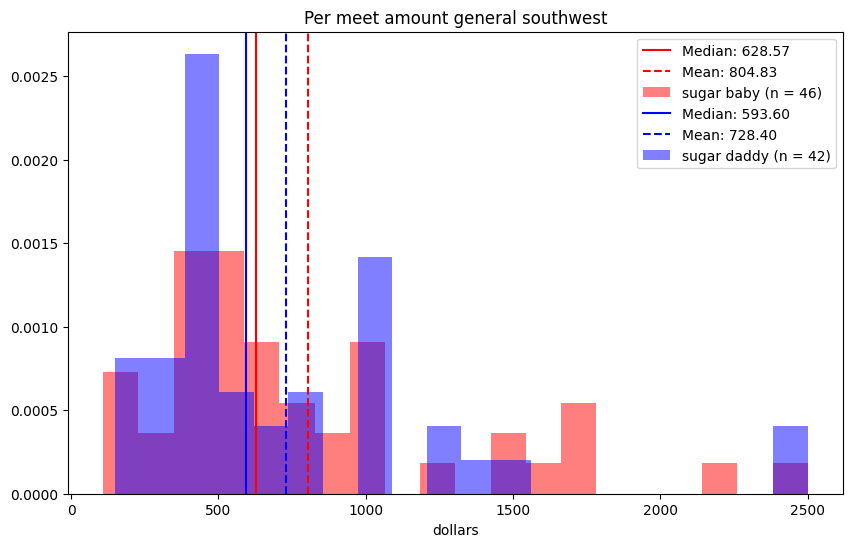

saved


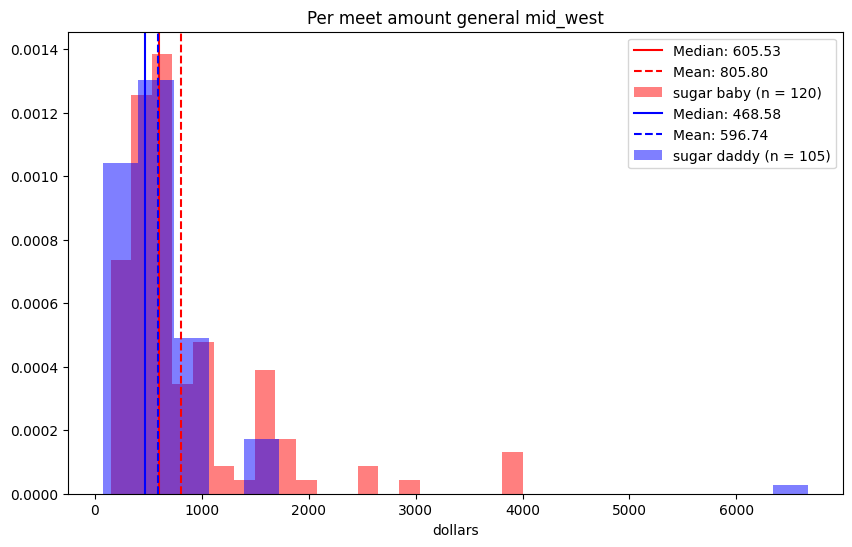

saved


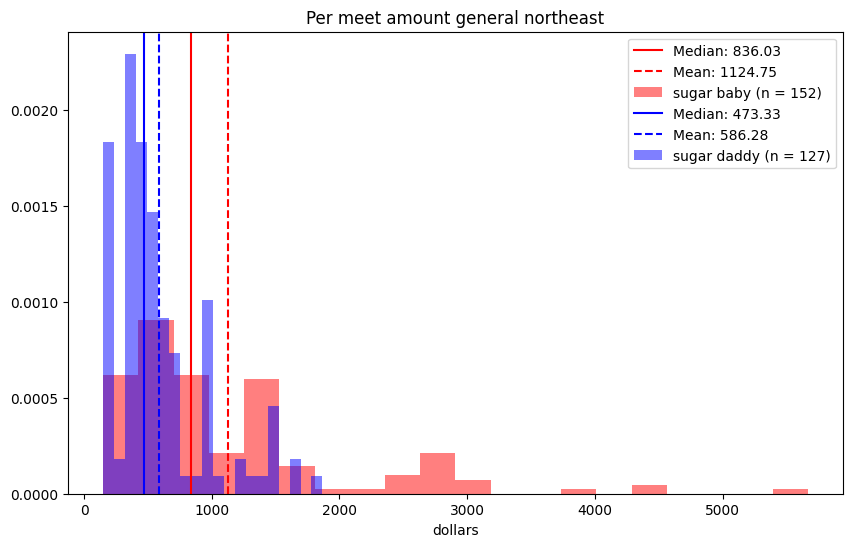

saved


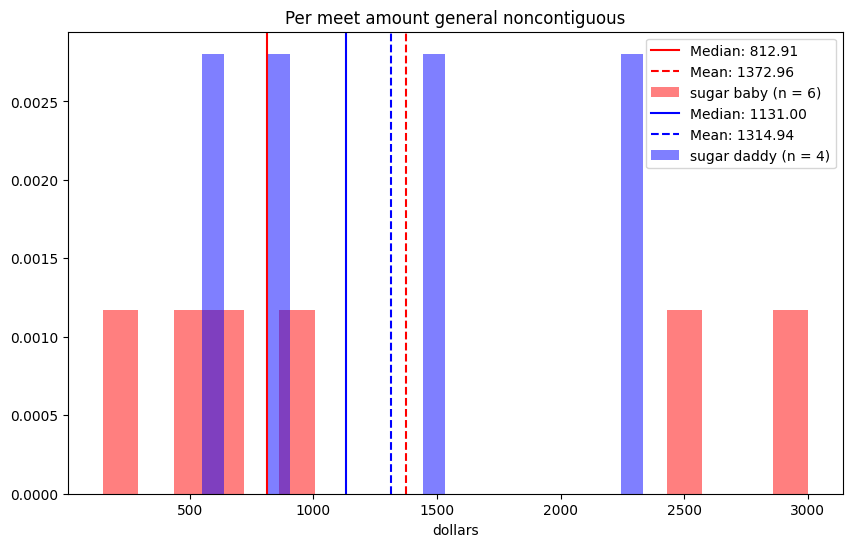

saved


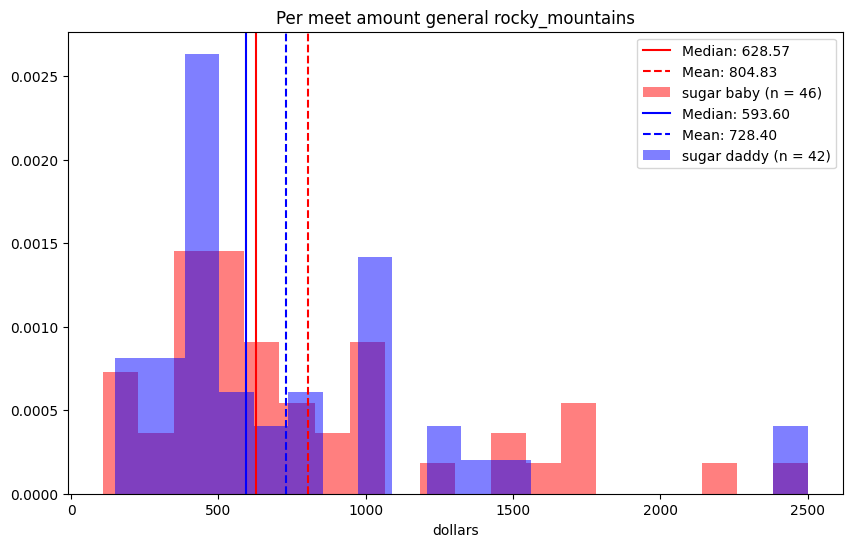

In [4]:
data = []
for title, df in dfs:
    sb_mean, sb_median, sd_mean, sd_median = plot_sb_sd_diff(df=df,title=title)
    data.append({'loc':title,'sb_mean':sb_mean, 'sb_median':sb_median, 'sd_mean':sd_mean, 'sd_median':sd_median})

In [5]:
data_df =pd.DataFrame(data)
data_df

,loc,sb_mean,sb_median,sd_mean,sd_median
0,southeast,752.739155,595.003839,486.921158,412.368186
1,west_coast,1079.129128,861.319582,665.247468,553.825898
2,mid_atlantic,903.405612,700.641636,723.404353,550.558346
3,southwest,804.831900,628.567379,728.404654,593.604250
4,mid_west,805.802171,605.528460,596.743919,468.576281
5,northeast,1124.753906,836.029956,586.284038,473.334044
6,noncontiguous,1372.963642,812.905350,1314.941102,1130.999505
7,rocky_mountains,804.831900,628.567379,728.404654,593.604250


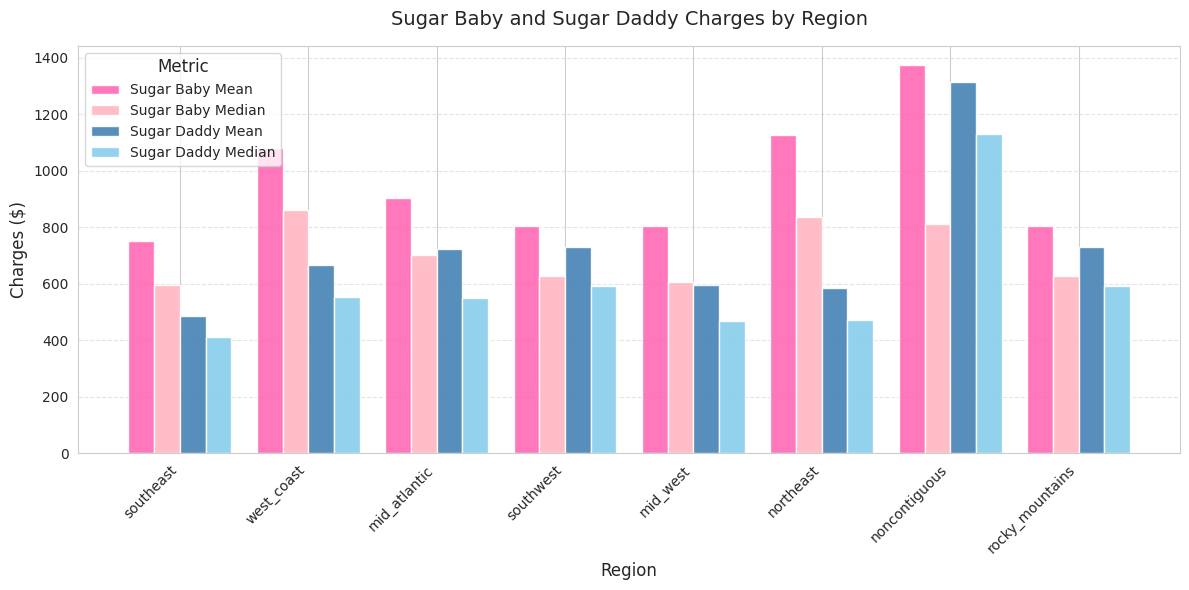

In [6]:

# Set seaborn style for a clean look
sns.set_style("whitegrid")

# Initialize the plot
plt.figure(figsize=(12, 6))

# Bar positions
bar_width = 0.2
index = np.arange(len(data_df['loc']))

# Plot bars with pink for SB and blue for SD
plt.bar(index, data_df['sb_mean'], bar_width, label='Sugar Baby Mean', color='#FF69B4', alpha=0.9)  # Hot Pink
plt.bar(index + bar_width, data_df['sb_median'], bar_width, label='Sugar Baby Median', color='#FFB6C1', alpha=0.9)  # Light Pink
plt.bar(index + 2 * bar_width, data_df['sd_mean'], bar_width, label='Sugar Daddy Mean', color='#4682B4', alpha=0.9)  # Steel Blue
plt.bar(index + 3 * bar_width, data_df['sd_median'], bar_width, label='Sugar Daddy Median', color='#87CEEB', alpha=0.9)  # Sky Blue

# Customize
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.title('Sugar Baby and Sugar Daddy Charges by Region', fontsize=14, pad=15)
plt.xticks(index + 1.5 * bar_width, data_df['loc'], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=10, title_fontsize=12, loc='upper left')

# Add subtle grid and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Display
plt.show()

saved


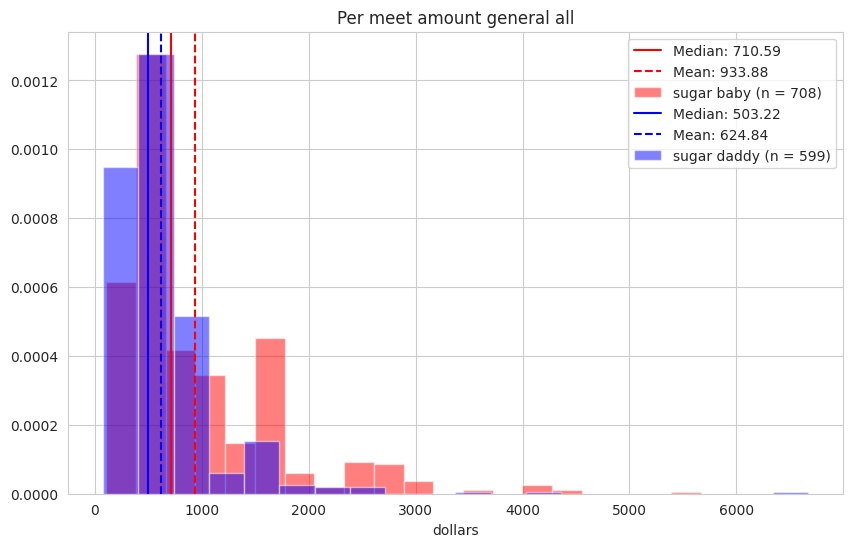

(933.8752727735703, 710.5921589006731, 624.840517711926, 503.21868432807537)

In [7]:
df_all = pd.concat([df for title,df in dfs])
plot_sb_sd_diff(df=df_all,title = 'all')